# Udacity
# WeRateDogs Project
----------------------------------------

    In this project I will process the data received from three different sources based on the "We Rate Dogs" 
    social media accounts, wrangle, clean and analyse it, as well as visualise and report my findings. One of 
    the sources is a pre-processed "We Rate Dogs" Twitter archive containing over 5000 tweets. Another source 
    is "tweet image predictions" which gives predictions about the breed of dogs and other information according 
    to a neural network, received in the form of a URL.
    The remaining necessary information is obtained by querying the Twitter API. 

    The overall goal is to assess which breed of dog is the most popular one. While working on this project, 
    we need to keep in mind that the data is based on humorous content and that the ratings per se are all 
    very positive and do not follow traditional scientific logic (e.g. the dogs receive ratings higher than 
    the presented threshold of 10, because they are all "very good boys").


## Tasks of this project:
------------------------------
    -Data wrangling
        Gathering data
        Assessing data
    -Cleaning data
    -Storing, analyzing, and visualizing wrangled data
    -Reporting on 
        1) data wrangling efforts
        2) data analyses and visualizations

In [286]:
# importing libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from timeit import default_timer as timer
warnings.filterwarnings('ignore')
pd.set_option("display.width", 1000)
pd.set_option('display.max_colwidth', -1)


## Data Wrangling

### Source 1: WeRateDogs Twitter Archive

In [288]:
# reading csv file and creating a pandas dataframe
df_archive = pd.read_csv("twitter-archive-enhanced.csv", error_bad_lines=False)


b'Skipping line 3: expected 17 fields, saw 21\nSkipping line 6: expected 17 fields, saw 18\nSkipping line 10: expected 17 fields, saw 18\nSkipping line 13: expected 17 fields, saw 18\nSkipping line 16: expected 17 fields, saw 18\nSkipping line 20: expected 17 fields, saw 18\nSkipping line 21: expected 17 fields, saw 20\nSkipping line 22: expected 17 fields, saw 20\nSkipping line 23: expected 17 fields, saw 18\nSkipping line 26: expected 17 fields, saw 18\nSkipping line 29: expected 17 fields, saw 18\nSkipping line 33: expected 17 fields, saw 18\nSkipping line 36: expected 17 fields, saw 18\nSkipping line 40: expected 17 fields, saw 20\nSkipping line 41: expected 17 fields, saw 20\nSkipping line 42: expected 17 fields, saw 18\nSkipping line 43: expected 17 fields, saw 20\nSkipping line 45: expected 17 fields, saw 18\nSkipping line 49: expected 17 fields, saw 19\nSkipping line 51: expected 17 fields, saw 19\nSkipping line 52: expected 17 fields, saw 18\nSkipping line 55: expected 17 fiel

In [289]:
# displaying head of df
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
#filterdf = df_archive[[not x.startswith('h') for x in df_archive.tweet_id]]
df_archive['tweet_id'] = pd.to_numeric(df_archive['tweet_id'], errors ='coerce')
filtereddf = df_archive[df_archive['tweet_id'].notnull()]
filtereddf['tweet_id']=filtereddf['tweet_id'].apply(lambda x: '{:.0f}'.format(x))
df_archive = filtereddf

In [291]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336320,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
2,891689557279858560,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
3,891087950875897728,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
4,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
df_archive['rating_numerator'].value_counts()

10      333
12      321
11      308
13      178
9       135
8       88 
7       53 
5       31 
6       28 
14      18 
3       17 
4       15 
1       9  
2       8  
15      1  
182     1  
1776    1  
144     1  
80      1  
27      1  
26      1  
121     1  
17      1  
44      1  
50      1  
165     1  
204     1  
420     1  
99      1  
60      1  
Name: rating_numerator, dtype: int64

### Source 2: Tweet Image Predictions

In [293]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [294]:
# downloading image predictions data via requests
resp = requests.get(url)
resp

<Response [200]>

In [295]:
# text of url content can be read like this, but commented out because very long
# resp.text

In [296]:
# creating a folder to save the content of url
folder_name = "image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [297]:
# creating a file in folder and writing image predictions content into it
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(resp.content)

In [298]:
# declaring path constant because jupyter notebook was not finding the file
PATH = "/Users/AKlabisch/Desktop/image_predictions/"

# creating pandas dataframe from the tsv
df_pred = pd.read_csv(PATH + "image-predictions.tsv", sep='\t')

In [14]:
# showing head of image-prediction file
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Source 3: Twitter API

In [15]:
# querying Twitter API for each tweet in the Twitter archive and save JSON in a text file
# hiding keys and tokens to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336320
Fail
2: 891815181378084864
Success
3: 891689557279858560
Fail
4: 891087950875897728
Fail
5: 890971913173991424
Success
6: 890609185150312320
Fail
7: 890240255349198720
Fail
8: 889880896479866880
Fail
9: 889665388333682560
Fail
10: 889531135344209920
Fail
11: 889278841981685760
Success
12: 888917238123831296
Success
13: 887705289381826560
Success
14: 887517139158093824
Success
15: 887343217045368832
Success
16: 887101392804085760
Success
17: 886736880519319552
Success
18: 886680336477933440
Fail
19: 886267009285017600
Success
20: 886258384151887872
Fail
21: 885984800019947520
Success
22: 885528943205470208
Success
23: 885518971528720384
Fail
24: 884562892145688448
Fail
25: 884247878851493760
Fail
26: 884162670584377344
Fail
27: 883838122936631296
Success
28: 883360690899218432
Success
29: 882762694511734784
Success
30: 882627270321602560
Success
31: 881906580714921984
Fail
32: 881666595344535552
Success
33: 881633300179243008
Success
34: 881536004380872704
Fail
35:

Fail
275: 813066809284972544
Fail
276: 813051746834595840
Success
277: 812709060537683840
Fail
278: 812503143955201920
Fail
279: 812466873996607360
Fail
280: 811985624773361664
Success
281: 811744202451197952
Fail
282: 811647686436880384
Success
283: 811627233043480448
Fail
284: 811386762094317440
Fail
285: 810984652412424320
Fail
286: 810657578271330304
Fail
287: 809448704142938112
Success
288: 808838249661788160
Success
289: 808733504066486272
Fail
290: 808344865868283904
Success
291: 808106460588765184
Fail
292: 807106840509214720
Success
293: 807010152071229440
Success
294: 806620845233815552
Success
295: 806576416489959424
Success
296: 806542213899489280
Success
297: 806219024703037440
Success
298: 805932879469572096
Success
299: 805826884734976000
Success
300: 805207613751304320
Fail
301: 804738756058218496
Success
302: 804475857670639616
Success
303: 803638050916102144
Success
304: 803380650405482496
Fail
305: 803321560782307328
Success
306: 803276597545603072
Success
307: 80295

Fail
544: 748568946752774144
Success
545: 748346686624440320
Fail
546: 748337862848962560
Success
547: 748220828303695872
Fail
548: 747963614829678720
Fail
549: 747844099428986880
Success
550: 747816857231626240
Success
551: 747651430853525504
Success
552: 747648653817413632
Success
553: 747594051852075008
Success
554: 747512671126323200
Success
555: 747461612269887360
Fail
556: 747439450712596480
Success
557: 746818907684614144
Success
558: 746757706116112384
Success
559: 746726898085036032
Fail
560: 746542875601690624
Fail
561: 746521445350707200
Success
562: 746369468511756160
Fail
563: 746131877086527360
Fail
564: 745789745784041472
Success
565: 745712589599014912
Fail
566: 745422732645535744
Success
567: 745074613265149952
Success
568: 744709971296780160
Fail
569: 744334592493166720
Fail
570: 744234799360020480
Fail
571: 744223424764059520
Fail
572: 743980027717509120
Success
573: 743895849529388928
Fail
574: 743835915802583040
Success
575: 743595368194129920
Success
576: 74322259

Success
810: 700747788515020800
Fail
811: 700518061187723264
Fail
812: 700462010979500032
Success
813: 700167517596164096
Success
814: 700151421916807168
Success
815: 700143752053182464
Success
816: 700062718104104960
Success
817: 700029284593901568
Success
818: 700002074055016448
Fail
819: 699788877217865728
Fail
820: 699775878809702400
Fail
821: 699434518667751424
Success
822: 699423671849451520
Success
823: 699370870310113280
Success
824: 699323444782047232
Success
825: 699088579889332224
Success
826: 699072405256409088
Success
827: 699060279947165696
Success
828: 699036661657767936
Success
829: 698989035503689728
Success
830: 698953797952008192
Success
831: 698710712454139904
Fail
832: 698703483621523456
Success
833: 698635131305795584
Success
834: 698549713696649216
Success
835: 698355670425473024
Success
836: 698342080612007936
Fail
837: 698262614669991936
Success
838: 698195409219559424
Fail
839: 698178924120031232
Success
840: 697995514407682048
Success
841: 697943111201378304


Fail
1072: 680497766108381184
Success
1073: 680494726643068928
Success
1074: 680440374763077632
Success
1075: 680221482581123072
Success
1076: 680206703334408192
Success
1077: 680191257256136704
Fail
1078: 680176173301628928
Success
1079: 680161097740095488
Fail
1080: 680130881361686528
Fail
1081: 680115823365742592
Success
1082: 680100725817409536
Success
1083: 680070545539371008
Success
1084: 679877062409191424
Success
1085: 679872969355714560
Success
1086: 679862121895714816
Fail
1087: 679854723806179328
Success
1088: 679844490799091712
Fail
1089: 679777920601223168
Success
1090: 679736210798047232
Success
1091: 679729593985699840
Success
1092: 679722016581222400
Success
1093: 679530280114372608
Fail
1094: 679527802031484928
Success
1095: 679511351870550016
Success
1096: 679503373272485888
Fail
1097: 679475951516934144
Success
1098: 679462823135686656
Success
1099: 679405845277462528
Success
1100: 679158373988876288
Success
1101: 679148763231985664
Fail
1102: 679132435750195200
Fail

Fail
1327: 672256522047614976
Fail
1328: 672254177670729728
Success
1329: 672248013293752320
Success
1330: 672245253877968896
Success
1331: 672239279297454080
Success
1332: 672231046314901504
Success
1333: 672222792075620352
Success
1334: 672205392827572224
Success
1335: 672169685991993344
Success
1336: 672160042234327040
Success
1337: 672139350159835136
Success
1338: 672125275208069120
Success
1339: 672095186491711488
Success
1340: 672082170312290304
Success
1341: 672068090318987264
Fail
1342: 671896809300709376
Success
1343: 671891728106971136
Fail
1344: 671882082306625536
Fail
1345: 671879137494245376
Success
1346: 671866342182637568
Success
1347: 671855973984772096
Success
1348: 671789708968640512
Success
1349: 671763349865160704
Success
1350: 671744970634719232
Success
1351: 671743150407421952
Success
1352: 671729906628341760
Fail
1353: 671561002136281088
Success
1354: 671550332464455680
Success
1355: 671544874165002240
Success
1356: 671542985629241344
Success
1357: 67153830115790

Success
1580: 667369227918143488
Success
1581: 667211855547486208
Success
1582: 667200525029539840
Fail
1583: 667192066997374976
Success
1584: 667188689915760640
Success
1585: 667182792070062080
Fail
1586: 667177989038297088
Success
1587: 667176164155375616
Success
1588: 667171260800061440
Success
1589: 667165590075940864
Fail
1590: 667160273090932736
Fail
1591: 667152164079423488
Fail
1592: 667138269671505920
Success
1593: 667119796878725120
Success
1594: 667090893657276416
Fail
1595: 667073648344346624
Success
1596: 667070482143944704
Fail
1597: 667065535570550784
Success
1598: 667062181243039744
Fail
1599: 667044094246576128
Success
1600: 667012601033924608
Success
1601: 666996132027977728
Success
1602: 666983947667116032
Fail
1603: 666837028449972224
Success
1604: 666835007768551424
Success
1605: 666826780179869696
Fail
1606: 666817836334096384
Success
1607: 666804364988780544
Success
1608: 666786068205871104
Success
1609: 666781792255496192
Success
1610: 666776908487630848
Success

In [17]:
# creating an empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [18]:
print(tweets[0])

{'created_at': 'Mon Jul 31 00:18:03 +0000 2017', 'id': 891815181378084864, 'id_str': '891815181378084864', 'full_text': 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB', 'truncated': False, 'display_text_range': [0, 121], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize':

In [299]:
# creating pandas dataframe
df_api = pd.DataFrame()  

# displaying only a part of the dataframe
df_api['id'] = list(map(lambda tweet: tweet['id'], tweets))

df_api['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

df_api['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [300]:
df_api.head()

,id,retweet_count,favorite_count
0,891815181378084864,3850,23901
1,890971913173991424,0,0
2,889278841981685760,4970,24010
3,888917238123831296,4193,27753
4,887705289381826560,4993,28799


## Assessing Data

In [301]:
# checking datatypes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 0 to 1763
Data columns (total 17 columns):
tweet_id                      1653 non-null object
in_reply_to_status_id         59 non-null object
in_reply_to_user_id           59 non-null object
timestamp                     1653 non-null object
source                        1653 non-null object
text                          1653 non-null object
retweeted_status_id           57 non-null object
retweeted_status_user_id      43 non-null object
retweeted_status_timestamp    43 non-null object
expanded_urls                 1512 non-null object
rating_numerator              1558 non-null object
rating_denominator            1558 non-null object
name                          1558 non-null object
doggo                         1558 non-null object
floofer                       1558 non-null object
pupper                        1558 non-null object
puppo                         1558 non-null object
dtypes: object(17)
memory usage: 232

In [302]:
# dropping duplicates in case they exist
df_archive = df_archive.drop_duplicates()

In [303]:
# checking datatypes
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [304]:
# dropping duplicates in case they exist
df_pred = df_pred.drop_duplicates()

In [305]:
# checking datatypes
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 3 columns):
id                1046 non-null int64
retweet_count     1046 non-null int64
favorite_count    1046 non-null int64
dtypes: int64(3)
memory usage: 24.6 KB


In [306]:
# dropping duplicates in case they exist
df_api = df_api.drop_duplicates()

Checking Content Quality of the first source "df_archive"

In [307]:
df_archive['rating_numerator'].value_counts()
#df_archive['rating_denominator'].value_counts()

10      333
12      321
11      308
13      178
9       135
8       88 
7       53 
5       31 
6       28 
14      18 
3       17 
4       15 
1       9  
2       8  
15      1  
182     1  
1776    1  
144     1  
80      1  
27      1  
26      1  
121     1  
17      1  
44      1  
50      1  
165     1  
204     1  
420     1  
99      1  
60      1  
Name: rating_numerator, dtype: int64

Some of the columns of ratings seem to be mixed up with dog names

In [308]:
df_archive['name'].value_counts()

None        488
a           46 
Lucy        9  
the         8  
Sadie       8  
Charlie     7  
Winston     6  
an          6  
Tucker      6  
Daisy       5  
Jax         5  
very        5  
Buddy       5  
Toby        5  
Oliver      5  
Cooper      5  
Penny       5  
Beau        4  
Derek       4  
Lola        4  
Oakley      4  
Milo        4  
Oscar       4  
Chip        4  
Rusty       4  
Hank        4  
Jack        4  
Alfie       4  
Sophie      4  
Bo          4  
           ..  
Skittles    1  
Sweets      1  
Jaycob      1  
Harvey      1  
Ember       1  
Lorenzo     1  
Bobb        1  
Taco        1  
Spanky      1  
Leonidas    1  
Tyrus       1  
Tater       1  
Tedrick     1  
Harrison    1  
Gordon      1  
Nida        1  
Stormy      1  
Stu         1  
Davey       1  
Mack        1  
Gustaf      1  
Arya        1  
Noah        1  
Mojo        1  
Rolf        1  
Seamus      1  
Rudy        1  
Sky         1  
Dex         1  
Mason       1  
Name: name, Length: 742,

# Data Cleaning

Cleaning of the three obtained dataframes:
    - df_archive
    - df_pred
    - df_api

Tidiness Issues
    - dog age categories are all in separate columns, should be merged
    - df_archive and df_api should be merged

Quality Issues
    - there are a lot of missing values in df_archive
    - there is an inconsistency in indicating missing values ("None" vs. "NaN" vs. "")
    - the name list contains "a", "an", "the" and "officially" and other values which are not names
    - some rows are moved to the left and needed to be dropped beforehand ("https..." in "tweet_id" row)
    - the rating pattern is not consistent, as it is humorous content 
    (some ratings very high, falsifying data analysis results)
    - the dog names include "_" as well as upper and lower case 
    - some dog age stages are a compound of two stages (it is unknown whether this was done on purpose 
    in some cases or whether it is a formatting error)
    - in the image prediction results, some are not dog breeds, but objects and need to be dropped


### Cleaning and merging of Archive source and API source

In [309]:
# making copies for cleaning
df_archive_clean = df_archive.copy()
df_pred_clean = df_pred.copy()
df_api_clean = df_api.copy()

In [310]:
# using for loop to replace the name "a" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('a', ' ')

In [311]:
# using for loop to replace the name "an" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('an', ' ')

In [312]:
# using for loop to replace the name "the" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('the', ' ')

In [313]:
# using for loop to replace the name "None" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('None', ' ')

In [314]:
# using for loop to replace the name "officially" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('officially', ' ')

In [315]:
# using for loop to replace the name "NaN" with " "
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('NaN', ' ')

In [316]:
df_archive_clean['name'].value_counts()

            549
Lucy        9  
Sadie       8  
Charlie     7  
Winston     6  
Tucker      6  
Jax         5  
Buddy       5  
Penny       5  
Oliver      5  
Cooper      5  
very        5  
Toby        5  
Daisy       5  
Bo          4  
Reggie      4  
Milo        4  
Jack        4  
Hank        4  
Oakley      4  
Chip        4  
Alfie       4  
Rusty       4  
Lola        4  
Derek       4  
Sophie      4  
Oscar       4  
Beau        4  
Scooter     3  
Archie      3  
           ..  
Cuddles     1  
Tyrus       1  
Skittles    1  
Jaycob      1  
Harvey      1  
Ember       1  
Lorenzo     1  
Bobb        1  
Taco        1  
Sweets      1  
Arya        1  
Divine      1  
Mack        1  
Tater       1  
Harrison    1  
Gordon      1  
Nida        1  
Stormy      1  
Stu         1  
Davey       1  
Tedrick     1  
Dex         1  
Gustaf      1  
Noah        1  
Mojo        1  
Rolf        1  
Seamus      1  
Rudy        1  
Sky         1  
Mason       1  
Name: name, Length: 738,

In [317]:
# making sure no "None" values are present for str.cat() method
age = ['doggo','floofer','pupper','puppo' ]
for i in age:
        df_archive_clean[i] = df_archive_clean[i].replace('None', "" )

In [318]:
# combining the data of dog age in one new column
df_archive_clean['age'] = df_archive_clean.doggo.str.cat(df_archive_clean.floofer).str.cat(df_archive_clean.pupper).str.cat(df_archive_clean.puppo)

# dropping the old columns
df_archive_clean = df_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [319]:
df_archive_clean.head(200)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age
0,892420643555336320,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
2,891689557279858560,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
3,891087950875897728,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,,
4,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890609185150312320,NaN,NaN,2017-07-27 16:25:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,
7,890240255349198720,NaN,NaN,2017-07-26 15:59:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
8,889880896479866880,NaN,NaN,2017-07-25 16:11:53 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,
9,889665388333682560,NaN,NaN,2017-07-25 01:55:32 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,,puppo
10,889531135344209920,NaN,NaN,2017-07-24 17:02:04 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo


In [320]:
# "None" still present
# repeating procedure for other columns which will be used later on

In [321]:
# using for loop to replace "None" with ""
rating_numerator = ["rating_numerator"]
for i in rating_numerator:
        df_archive_clean[i] = df_archive_clean[i].replace('None', '')

In [322]:
# using for loop to replace "None" with ""
rating_denominator = ["rating_denominator"]
for i in rating_denominator:
        df_archive_clean[i] = df_archive_clean[i].replace('None', '')

In [323]:
# using for loop to replace "None" with ""
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace('None', '')

In [324]:
# using for loop to replace "None" with ""
age = ["age"]
for i in age:
        df_archive_clean[i] = df_archive_clean[i].replace('None', '')

In [325]:
#df_archive_clean.head(100)

In [326]:
# using np.nan to fill missing data
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].replace('', np.nan)

In [327]:
# using np.nan to fill missing data
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].replace('', np.nan)

In [390]:
# using np.nan to fill missing data
df_archive_clean['name'] = df_archive_clean['name'].replace('', np.nan)

In [329]:
# using np.nan to fill missing data
df_archive_clean['age'] = df_archive_clean['age'].replace('', np.nan)

In [391]:
# displaying more of the dataframe to see if it worked
df_archive_clean.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age
0,892420643555336320,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
2,891689557279858560,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
3,891087950875897728,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,,NaN
4,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890609185150312320,NaN,NaN,2017-07-27 16:25:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
7,890240255349198720,NaN,NaN,2017-07-26 15:59:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
8,889880896479866880,NaN,NaN,2017-07-25 16:11:53 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,NaN
9,889665388333682560,NaN,NaN,2017-07-25 01:55:32 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,,puppo
10,889531135344209920,NaN,NaN,2017-07-24 17:02:04 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo


In [331]:
# still some "" values left

In [392]:
# using for loop to fill missing values
age = ["age"]
for i in age:
        df_archive_clean[i] = df_archive_clean[i].replace('', np.nan)

In [394]:
# using for loop to fill missing values
name = ["name"]
for i in name:
        df_archive_clean[i] = df_archive_clean[i].replace(' ', np.nan)

In [395]:
df_archive_clean.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age
0,892420643555336320,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
2,891689557279858560,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
3,891087950875897728,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN
4,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890609185150312320,NaN,NaN,2017-07-27 16:25:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
7,890240255349198720,NaN,NaN,2017-07-26 15:59:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
8,889880896479866880,NaN,NaN,2017-07-25 16:11:53 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,NaN
9,889665388333682560,NaN,NaN,2017-07-25 01:55:32 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,NaN,puppo
10,889531135344209920,NaN,NaN,2017-07-24 17:02:04 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo


In [335]:
# preparing merging of two dataframes (df_archive and df_pred)
# renaming the "id" column from df_api to "tweet id"
df_api_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [336]:
df_api_clean.head()

,tweet_id,retweet_count,favorite_count
0,891815181378084864,3850,23901
1,890971913173991424,0,0
2,889278841981685760,4970,24010
3,888917238123831296,4193,27753
4,887705289381826560,4993,28799


In [337]:
df_archive_clean.dtypes

tweet_id                      object
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator              object
rating_denominator            object
name                          object
age                           object
dtype: object

In [338]:
df_api_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [401]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age
0,892420643555336320,NaN,NaN,2017-08-01 16:23:56 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
2,891689557279858560,NaN,NaN,2017-07-30 15:58:51 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
3,891087950875897728,NaN,NaN,2017-07-29 00:08:17 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN
4,890971913173991424,NaN,NaN,2017-07-28 16:27:12 +0000,<a href=http://twitter.com/download/iphone rel=nofollow>Twitter for iPhone</a>,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
# dropping unnecessary columns because there are a lot of missing values
drop = ["timestamp", "text", "source", "expanded_urls", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_status_id", "in_reply_to_user_id"]

df_archive_dropped = df_archive_clean.drop(drop, axis = 1)

In [403]:
df_archive_dropped.head()

,tweet_id,rating_numerator,rating_denominator,name,age
0,892420643555336320,13,10,Phineas,NaN
1,891815181378084864,12,10,Archie,NaN
2,891689557279858560,13,10,Darla,NaN
3,891087950875897728,13,10,NaN,NaN
4,890971913173991424,NaN,NaN,NaN,NaN


In [404]:
df_api_clean.head()

,tweet_id,retweet_count,favorite_count
0,891815181378084864,3850,23901
1,890971913173991424,0,0
2,889278841981685760,4970,24010
3,888917238123831296,4193,27753
4,887705289381826560,4993,28799


In [405]:
# merging was not possible because of errors
# transforming the datatype to string in both columns of the two dataframes
df_archive_dropped['tweet_id'] = df_archive_dropped['tweet_id'].astype(str)
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype(str)

In [406]:
# merging both dataframes on the tweet ids with merge method using "outer"
df_merged = pd.merge(df_archive_dropped, df_api_clean, on='tweet_id', how = 'outer')

In [407]:
df_merged.head()

,tweet_id,rating_numerator,rating_denominator,name,age,retweet_count,favorite_count
0,892420643555336320,13,10,Phineas,NaN,NaN,NaN
1,891815181378084864,12,10,Archie,NaN,3850.0,23901.0
2,891689557279858560,13,10,Darla,NaN,NaN,NaN
3,891087950875897728,13,10,NaN,NaN,NaN,NaN
4,890971913173991424,NaN,NaN,NaN,NaN,0.0,0.0


In [408]:
#df_merged.head(100)

In [409]:
df_merged.rating_denominator.value_counts()

10     1545
50     2   
11     1   
40     1   
120    1   
150    1   
170    1   
15     1   
20     1   
110    1   
90     1   
80     1   
2      1   
Name: rating_denominator, dtype: int64

### Cleaning of Image Prediction source

In [410]:
df_pred.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [411]:
# changing column names for better overview
df_pred.rename(columns = {"p1": "prediction_1", "p1_conf": "confidence_1", "p1_dog": "breed_1",
                          "p2": "prediction_2", "p2_conf": "confidence_2", "p2_dog": "breed_2",
                          "p3": "prediction_3", "p3_conf": "confidence_3", "p3_dog": "breed_3"}, inplace = True)

In [412]:
df_pred.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [413]:
# getting rid of the "_" in the dog breed name and changing to upper case for consistency
for i in ("prediction_1","prediction_2","prediction_3"):
    df_pred[str(i)] = df_pred[str(i)].str.replace("_", " ")
    df_pred[str(i)] = df_pred[str(i)].str.title()

In [414]:
df_pred.head(50)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


In [415]:
#df_pred["prediction_1"].value_counts().head(100)

In [416]:
df_pred["prediction_1"].value_counts().head()

Golden Retriever      150
Labrador Retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Name: prediction_1, dtype: int64

    The fact that some predictions are not dog breeds, but objects, is not messing with the results much, 
    because their frequency is low. But I am removing them anyway for a better overview.

In [417]:
# removing all rows that contain object names instead of dog breeds
# only cleaning up the first 60 names
df_pred1 = df_pred[df_pred.prediction_1 != "Seat Belt"]
df_pred2 = df_pred1[df_pred1.prediction_1 != "Web Site"]
df_pred3 = df_pred2[df_pred2.prediction_1 != "Swing"]
df_pred4 = df_pred3[df_pred3.prediction_1 != "Tub"]
df_pred5 = df_pred4[df_pred4.prediction_1 != "Teddy"]
df_pred6 = df_pred5[df_pred5.prediction_1 != "Tennis Ball"]
df_pred7 = df_pred6[df_pred6.prediction_1 != "Doormat"]

In [418]:
#df_pred7["prediction_1"].value_counts().head(60)

    Initially removed "Cardigan", because I thought it was mislabelled as an object, but research showed 
    it is indeed a type of Corgi. I did some research on "Teddy", too, but it is not a breed, so it is taken out as well.

    Only the best predictions should be chosen, so I am dropping all rows where prediction 1 is False.

In [419]:
# dropping some columns and preparing merging with the other two dfs that have already been merged
drop = ["jpg_url", "img_num", "prediction_2", "confidence_2", "breed_2", "prediction_3", "confidence_3", "breed_3"]

df_pred_drop = df_pred7.drop(drop, axis = 1)

In [420]:
df_pred_drop.head()

,tweet_id,prediction_1,confidence_1,breed_1
0,666020888022790149,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German Shepherd,0.596461,True
3,666044226329800704,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,Miniature Pinscher,0.560311,True


In [421]:
# changing datatype to string
df_pred_drop["breed_1"] = df_pred_drop["breed_1"].astype(str)

In [422]:
# dropping all rows that have "False" in them
df_pred_clean = df_pred_drop[df_pred_drop.breed_1 != "False"]

In [423]:
# test showed that it needed to be changed to string type first
#df_pred_clean.head(500)

In [424]:
# sorting by highest prediction confidence
df_pred_sorted = df_pred_clean.sort_values(by='confidence_1', ascending=False)

In [425]:
#df_pred_sorted.head(500)

In [426]:
# filtering out high confidence results (prediction confidence over 30%)
#df_pred_high = df_pred_sorted[df_pred_sorted['confidence_1'] > 0.3]  

In [427]:
#df_pred_high.head(2000)

In [428]:
# dropping columns that are not needed anymore
drop = ["confidence_1", "breed_1"]

df_pred_final = df_pred_sorted.drop(drop, axis = 1)

In [429]:
df_pred_final.head()

,tweet_id,prediction_1
149,668636665813057536,Komondor
1372,762464539388485633,Chow
865,697463031882764288,Labrador Retriever
475,675149409102012420,Chow
1014,709566166965075968,Chow


In [430]:
# changing column name in preparation for merging
df_pred_final.rename(columns = {"prediction_1": "predicted_breed"}, inplace = True)

In [431]:
df_pred_final.head()

,tweet_id,predicted_breed
149,668636665813057536,Komondor
1372,762464539388485633,Chow
865,697463031882764288,Labrador Retriever
475,675149409102012420,Chow
1014,709566166965075968,Chow


In [432]:
# changing datatype to stringtype
df_pred_final['tweet_id'] = df_pred_final['tweet_id'].astype(str)

In [433]:
# merging dataframes on the tweet ids with merge method using "outer"
df_master = pd.merge(df_merged, df_pred_final, on='tweet_id', how = 'outer')

In [434]:
df_master.head()

,tweet_id,rating_numerator,rating_denominator,name,age,retweet_count,favorite_count,predicted_breed
0,892420643555336320,13,10,Phineas,NaN,NaN,NaN,NaN
1,891815181378084864,12,10,Archie,NaN,3850.0,23901.0,Chihuahua
2,891689557279858560,13,10,Darla,NaN,NaN,NaN,NaN
3,891087950875897728,13,10,NaN,NaN,NaN,NaN,NaN
4,890971913173991424,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [435]:
# defining the path to store master dataframe in a csv file
PATH = "/Users/AKlabisch/Desktop/master_csv/"

In [436]:
# storing the master dataframe in a csv file
df_master.to_csv(PATH + "master", sep='\t')

## Analyzing and Visualizing

### Most Popular Breed

 1) Which dog breed is the most popular one?

In [448]:
# getting overview of most popular breeds
df_master["predicted_breed"].value_counts().head()

Golden Retriever      150
Labrador Retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Name: predicted_breed, dtype: int64

In [449]:
# preparing plotting
breed = df_master[pd.notnull(df_master['predicted_breed'])]

Text(0.5, 1.0, 'Most Popular Dog Breed')

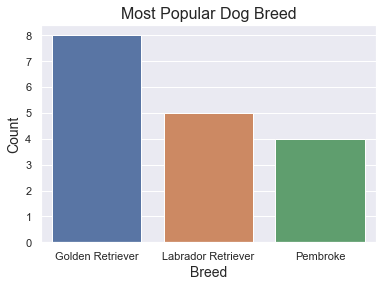

In [452]:
# plotting bar chart for breeds
sorted_breed = breed['predicted_breed'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = ages, x = 'predicted_breed', order = sorted_breed, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Popular Dog Breed',fontsize=16)

    As we can see, Golden Retriever, Labrador Retriever and Pembroke are the most prevalent 
    and thus most popular dog breeds : ).

### Dog Stages

  2) The dogs' ages are divided into four dog stages. Which one is the most posted and therefore the most popular one?

In [437]:
df_master["name"].value_counts().head(10)

Lucy       9
Sadie      8
Charlie    7
Tucker     6
Winston    6
Buddy      5
Jax        5
Penny      5
Toby       5
Cooper     5
Name: name, dtype: int64

In [438]:
#df_master.head(100)

In [439]:
df_master.head()

,tweet_id,rating_numerator,rating_denominator,name,age,retweet_count,favorite_count,predicted_breed
0,892420643555336320,13,10,Phineas,NaN,NaN,NaN,NaN
1,891815181378084864,12,10,Archie,NaN,3850.0,23901.0,Chihuahua
2,891689557279858560,13,10,Darla,NaN,NaN,NaN,NaN
3,891087950875897728,13,10,NaN,NaN,NaN,NaN,NaN
4,890971913173991424,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [440]:
df_master["age"].value_counts().head(10)

pupper         162
doggo          48 
puppo          11 
floofer        7  
doggopupper    4  
doggopuppo     1  
Name: age, dtype: int64

In [441]:
# plotting bar chart dog age

ages = df_master[pd.notnull(df_master['age'])]
ages.head(10)

,tweet_id,rating_numerator,rating_denominator,name,age,retweet_count,favorite_count,predicted_breed
6,890240255349198720,14,10,Cassie,doggo,NaN,NaN,NaN
8,889665388333682560,13,10,NaN,puppo,NaN,NaN,NaN
9,889531135344209920,13,10,Stuart,puppo,NaN,NaN,NaN
25,884162670584377344,12,10,Yogi,doggo,NaN,NaN,NaN
27,883360690899218432,13,10,Grizzwald,floofer,0.0,1.0,NaN
28,882762694511734784,12,10,Gus,pupper,4555.0,26967.0,Labrador Retriever
54,874296783580663808,13,10,Jed,pupper,3849.0,24916.0,Cocker Spaniel
61,871102520638267520,14,10,NaN,doggo,NaN,NaN,NaN
75,867421006826221440,12,10,Shikha,puppo,NaN,NaN,NaN
91,859607811541651328,13,10,NaN,puppo,NaN,NaN,NaN


Text(0.5, 1.0, 'Most Popular Dog Age')

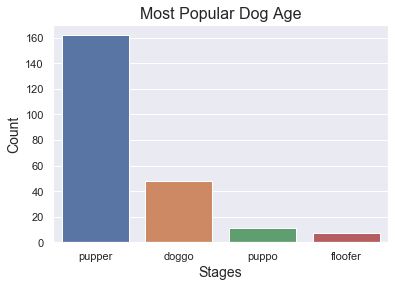

In [453]:
sorted_age = ages['age'].value_counts().head(4).index
sns.set(style="darkgrid")
sns.countplot(data = ages, x = 'age', order = sorted_age, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Popular Dog Age',fontsize=16)

    As we can see, "pupper" is the most posted dog type. It makes sense, since young dogs are considered the cutest : ).

### Dog Names

3) Which dog names are the most popular ones?

In [443]:
# plotting bar chart for dog names

names = df_master[pd.notnull(df_master['name'])]
names.head(10)

,tweet_id,rating_numerator,rating_denominator,name,age,retweet_count,favorite_count,predicted_breed
0,892420643555336320,13,10,Phineas,NaN,NaN,NaN,NaN
1,891815181378084864,12,10,Archie,NaN,3850.0,23901.0,Chihuahua
2,891689557279858560,13,10,Darla,NaN,NaN,NaN,NaN
5,890609185150312320,13,10,Zoey,NaN,NaN,NaN,NaN
6,890240255349198720,14,10,Cassie,doggo,NaN,NaN,NaN
7,889880896479866880,13,10,Bruno,NaN,NaN,NaN,NaN
9,889531135344209920,13,10,Stuart,puppo,NaN,NaN,NaN
10,889278841981685760,13,10,Oliver,NaN,4970.0,24010.0,Whippet
11,888917238123831296,12,10,Jim,NaN,4193.0,27753.0,Golden Retriever
12,887705289381826560,13,10,Jeffrey,NaN,4993.0,28799.0,Basset


Text(0.5, 1.0, 'Most Popular Dog Names')

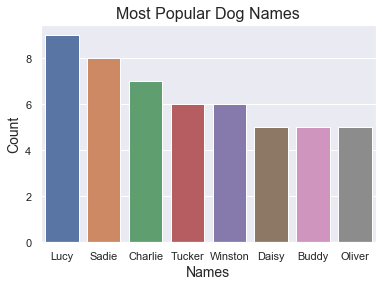

In [447]:
sorted_names = names['name'].value_counts().head(8).index
sns.set(style="darkgrid")
sns.countplot(data = names, x = 'name', order = sorted_names, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Names', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Popular Dog Names',fontsize=16)

    As we can see, Lucy, Sadie and Charlie are the most popular dog names. Followed directly by Tucker, 
    winston, Daisy, Buddy and Oliver : ).

    Sources:
            http://www.compciv.org/guides/python/how-tos/downloading-files-with-requests/
            https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe
            https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783551668/1/
            ch01lvl1sec10/reading-and-writing-csv-tsv-files-with-python
            https://stackoverflow.com/questions/39267614/csv-file-does-not-exist-pandas-dataframe
            https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
            https://wiki.python.org/moin/HandlingExceptions
            https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
            https://stackoverflow.com/questions/11858472/string-concatenation-of-two-pandas-columns
            https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
            https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
            https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
            https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
            https://medium.com/@waliamrinal/saving-a-pandas-dataframe-as-a-csv-file-4f8b74b7a1bc
            https://medium.com/@waliamrinal/saving-a-pandas-dataframe-as-a-csv-file-4f8b74b7a1bc
            https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that
            -contains-a-particular-string-in-a-p/43399866
            https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string
            https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
            https://stackoverflow.com/questions/25050141/how-to-filter-in-nan-pandas/25050185
            https://seaborn.pydata.org/generated/seaborn.countplot.html